In [3]:
import numpy as np
import os

import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
#import matplotlib.lines as mlines
import seaborn as sns
#from utilsplot import tsplot
import pandas as pd
%matplotlib inline

In [16]:
PATH_TNT_DIR='logs_/IPD/'
PATH_TNT_SEED=PATH_TNT_DIR+'/r-%d/progress.json'
numseed=len(os.listdir(PATH_TNT_DIR))
seed_r=range(numseed)

In [17]:
dfs=[pd.read_json(path_or_buf=PATH_TNT_SEED%seed,orient="records",
                  lines=True) for seed in seed_r]
state=["CC","CD","DC","DD","s0"]
for i in range(5):
    for eldf in dfs:
        eldf[state[i]]=state[i]

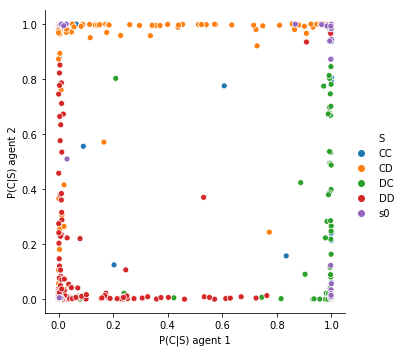

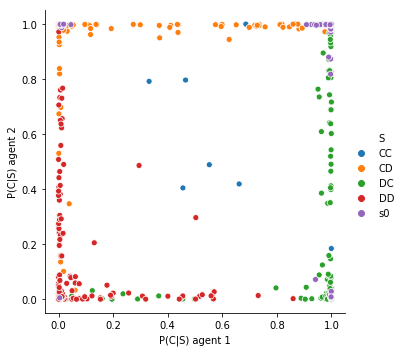

In [18]:
for ind in range(numseed):
    proba=[]
    df1=dfs[ind]
    p_index=1
    for i in range(5):
        proba.append(df1[['1theta_1_%d'%i,'2theta_2_%d'%i,state[i]]])
    tl=list(np.asarray(proba[0].values))
    for i in range(1,5):
        tl.extend(np.asarray(proba[i].values))
    dfp=pd.DataFrame(tl,columns=['P(C|S) agent 1','P(C|S) agent 2','S'])

    sns_plot=sns.relplot(x="P(C|S) agent 1", y="P(C|S) agent 2",hue="S",
                data=dfp)
sns_plot.savefig("lola_lola_pp__.eps")